In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers, Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"durgeshpal","key":"6f6f0f069d7ef1bdb954e0bfea17f6ba"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d durgeshpal/pdataset

 99% 1.73G/1.75G [00:07<00:00, 230MB/s]
100% 1.75G/1.75G [00:07<00:00, 262MB/s]


In [8]:
!unzip pdataset.zip

स्ट्रीम किए जा रहे आउटपुट को आखिरी 5000 लाइनों तक छोटा किया गया.
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (383).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (386).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (389).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (405).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (406).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (42).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (424).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (430).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (435).jpg  
  inflating: content/test_train-original/test/Apple Venturia inaequalis(633)/img (436).jpg  
  infl

In [9]:
train_dir = "/content/content/test_train-original/train"
val_dir = "/content/content/test_train-original/val"
test_dir = "/content/content/test_train-original/test"

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                                                          # featurewise_center=True,
                                                          # featurewise_std_normalization=True,
                                                          # rotation_range=90,
                                                          # width_shift_range=0.2,
                                                          # height_shift_range=0.2,
                                                          # horizontal_flip=True,
                                                          # zoom_range=0.2,
                                                          )

In [11]:
train_gen = datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                        shuffle=True,
                                                 class_mode = 'categorical')
test_gen= datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=False,
                                            class_mode ='categorical')
val_gen = datagen.flow_from_directory(val_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                      shuffle=True,
                                          class_mode = 'categorical')

Found 4077 images belonging to 20 classes.
Found 526 images belonging to 20 classes.
Found 502 images belonging to 20 classes.


In [12]:
# Visualizing data
import os 
def visualize_random_images(dataset_type="train", label_type="Downy mildew(120)"):
    
    sample = 9
    
    plt.figure(figsize=(15, 8))
    type_dir = train_dir if dataset_type=="train" else test_dir
    base_dir = os.path.join(type_dir, label_type)
    images = random.sample(os.listdir(base_dir), 9)
    
    for i, image in enumerate(images):
        plt.subplot(3, 3, i+1)
        img = plt.imread(os.path.join(base_dir, image))
        plt.imshow(img)

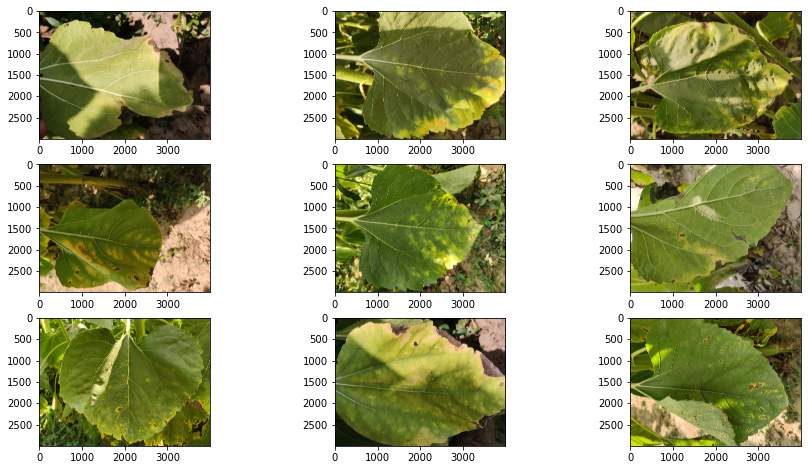

In [13]:
visualize_random_images("/content/content/test_train-original/train/Downy mildew(120)/downymildew.  (102).jpg")

In [14]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [15]:
from keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [16]:

# model=Sequential()


# model.add(Conv2D(32, (3, 3) ,activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(64, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())


# model.add(Conv2D(64, (3, 3) ,activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3) ,activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3) ,activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3) ,activation='relu', padding='same'))
# model.add(MaxPooling2D(2, padding='same'))
# model.add(BatchNormalization())

# model.add(Flatten())

# model.add(Dense(1024 , activation='relu'))
# model.add(layers.Dropout(.2))
# model.add(Dense(1024, activation='relu'))
# model.add(layers.Dropout(.2))

# model.add(Dense(20, activation='softmax'))


In [17]:
base_model = tf.keras.applications.efficientnet.EfficientNetB1(include_top=False)
base_model.trainable = False

for layer in base_model.layers:
  layer.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
base_layer = base_model(inputs)
dropout_layer_1 = layers.Dropout(0.2)(base_layer)
flat_layer = layers.Flatten()(dropout_layer_1)

outputs = layers.Dense(20, activation="softmax")(flat_layer)
model = Model(inputs, outputs)

27033600/27018416 [==============================] - 0s 0us/step


In [18]:
# base_model =tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(224,224,3))
# base_model.trainable = False

# for layer in base_model.layers[:-5]:
#   layer.trainable = False


# inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
# # base_layer = base_model(inputs)
# # dropout_layer_1 = layers.Dropout(0.2)(base_layer)
# # flat_layer = layers.Flatten()(dropout_layer_1)
# # dense_1 = layers.Dense(512, activation="relu")(flat_layer)
# # dropout_layer_2 = layers.Dropout(0.2)(dense_1)
# # dense_2 = layers.Dense(512, activation="relu")(dropout_layer_2)
# # outputs = layers.Dense(20, activation="softmax")(dense_2)
# # model = Model(inputs, outputs)

In [19]:
# transfer_model=base_model.output
# transfer_model=MaxPooling2D(pool_size=(4, 4))(transfer_model)
# transfer_model=Flatten()(transfer_model)
# transfer_model=Dense(512, activation='relu')(transfer_model)
# transfer_model=Dropout(0.2)(transfer_model)
# transfer_model=Dense(512, activation='relu')(transfer_model)
# transfer_model=Dropout(0.2)(transfer_model)
# transfer_model=Dense(20, activation='softmax')(transfer_model)

# model = Model(inputs=base_model.input, outputs=transfer_model)
# model.summary()

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='recall', patience=2, mode='max', restore_best_weights=True, verbose=1
)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(train_gen,
                       epochs=40,
                    callbacks=[early_stopping],
                       validation_data=val_gen)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
128/128 [==============================] - 115s 756ms/step - loss: 2.0292 - accuracy: 0.7302 - val_loss: 0.9150 - val_accuracy: 0.8825
Epoch 2/40
128/128 [==============================] - 94s 737ms/step - loss: 0.3704 - accuracy: 0.9362 - val_loss: 0.9387 - val_accuracy: 0.8785
Epoch 3/40
128/128 [==============================] - 94s 738ms/step - loss: 0.1820 - accuracy: 0.9664 - val_loss: 1.0054 - val_accuracy: 0.8984
Epoch 4/40
128/128 [==============================] - 94s 737ms/step - loss: 0.1814 - accuracy: 0.9713 - val_loss: 0.9198 - val_accuracy: 0.9004
Epoch 5/40
128/128 [==============================] - 94s 734ms/step - loss: 0.1972 - accuracy: 0.9730 - val_loss: 1.2315 - val_accuracy: 0.8745
Epoch 6/40
128/128 [==============================] - 94s 730ms/step - loss: 0.2265 - accuracy: 0.9718 - val_loss: 1.3610 - val_accuracy: 0.8705
Epoch 7/40
128/128 [==============================] - 94s 735ms/step - loss: 0.1899 - accuracy: 0.9750 - val_loss: 1.5053 - val_a

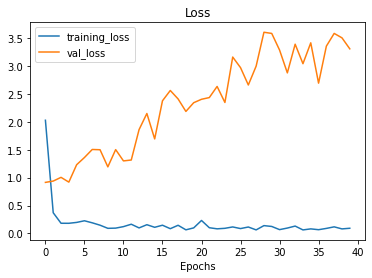

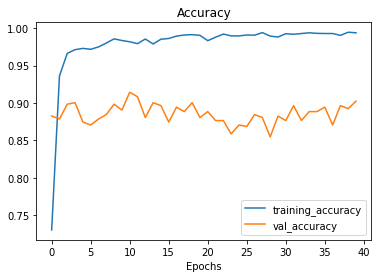

In [22]:
plot_loss_curves(history)

In [23]:
model.evaluate(test_gen)

17/17 [==============================] - 11s 700ms/step - loss: 3.4184 - accuracy: 0.8916


[3.418419599533081, 0.891635000705719]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from keras.utils.np_utils import to_categorical
import numpy as np
print("==============TEST RESULTS============")

num_classes = len(train_gen.class_indices)
test_labels = test_gen.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)
y_true = [i.argmax() for i in test_labels]

predictions = model.predict(test_gen, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
confusion_mtx = confusion_matrix(true_classes, yPredictions) 
y_pred_probabilities=yPredictions
classnames=[]
for classname in test_gen.class_indices:
    classnames.append(classname)

target_names = classnames
print(classification_report(true_classes, yPredictions, target_names=target_names))

# print('roc_auc_score = ' + str(roc_auc_score( true_classes, yPredictions)))

==============TEST RESULTS============
17/17 [==============================] - 12s 662ms/step
                                     precision    recall  f1-score   support

               Apple Aphis spp(162)       0.73      0.94      0.82        17
      Apple Eriosoma lanigerum(366)       1.00      0.79      0.88        38
           Apple Monillia laxa(255)       0.78      0.81      0.79        26
     Apple Venturia inaequalis(633)       0.82      0.94      0.88        64
Apricot Coryneum beijerinckii(1101)       0.95      0.95      0.95       111
          Apricot Monillia laxa(85)       1.00      0.56      0.71         9
                 Cancer symptom(76)       0.82      1.00      0.90         9
              Cherry Aphis spp(356)       1.00      0.86      0.93        37
                  Downy mildew(120)       0.73      0.92      0.81        12
                Drying symptom(156)       1.00      1.00      1.00        15
                      Gray mold(72)       0.89      1.00 

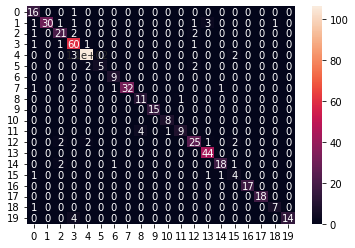

In [25]:
sns.heatmap(confusion_mtx.astype("int"), annot=True)